In [1]:
Character recognition with neural networks MNIST employs two hidden layers. 
The first hidden layer uses the ReLU function, while the second hidden layer uses the Sigmoid function,
and each layer includes 512 norons. The result uses the Soft Max function

- Doing mathematical simulations - Write SGD mini-batch and batch size = 200 Python scripts.
- Creating models (mathematical equations, based on matrices, for the entire training and inference process)
- Write your code in Python rather than using modules that help with neural network creation.

SyntaxError: invalid syntax (53298243.py, line 1)

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizing the MNIST dataset
x_train = np.reshape(x_train, (60000,784))/255.0
x_test = np.reshape(x_test, (10000,784))/255.0
y_train = np.matrix(np.eye(10)[y_train])
y_test = np.matrix(np.eye(10)[y_test])

# Input 784 nodes (28x28 pixel)
print(x_train.shape)

# 10 output nodes represent digital numbers ranging from 0 to 9.
print(y_train.shape)



(60000, 784)
(60000, 10)


In [3]:
# Explaining how np.reshape working by example 
# Giving array with random below
# x = [10, 9, 1, 2, 3, 5, 2, 7, 3, 7, 8, 10, 20, 40, 33, 29, 54, 25, 29, 30]

# print(x)
# [10, 9, 1, 2, 3, 5, 2, 7, 3, 7, 8, 10, 20, 40, 33, 29, 54, 25, 29, 30]

# print(np.reshape(x, (5, 4)))
# [[10  9  1  2]
# [ 3  5  2  7]
# [ 3  7  8 10]
# [20 40 33 29]
# [54 25 29 30]]

In [4]:
# Explaining np.eye for output.
# print(np.eye(10)) 
# [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
# [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
# [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
# [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
# [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
# [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
# [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
# [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
# [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
# [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

# We identify 0 mean 1 0 0 0 0 0 0 0 0 0
# 1 mean 0 1 0 0 0 0 0 0 0 0 
# => ... => 
# 9 mean 0 0 0 0 0 0 0 0 0 1 




In [5]:
# Define active function.
def relu(x):
    return (np.maximum(0.0, x))
def sigmoid(x):
    return 1./(1.+np.exp(-x))
def softmax(x):
    return np.divide(np.matrix(np.exp(x)),np.mat(np.sum(np.exp(x),axis=1)))




In [6]:
def Forwardpass(X,Wh1,bh1,Wh2,bh2,Wo,bo):
    zh1 = X@Wh1.T + bh1
    a = relu(zh1) # output of layer 1
    
    zh2 = a@Wh2.T + bh2 
    b = sigmoid(zh2) # output of layer 2
    
    z = b@Wo.T + bo
    o = softmax(z)  # output 
    return o

def AccTest(label,prediction): # calculate the matching score
    OutMaxArg=np.argmax(prediction,axis=1)
    LabelMaxArg=np.argmax(label,axis=1)
    Accuracy=np.mean(OutMaxArg==LabelMaxArg)
    return Accuracy

In [16]:
learningRate = 0.1
Epoch=100
NumTrainSamples=60000
NumTestSamples=10000
NumInputs=784
NumHiddenUnits=512
NumClasses=10

#inital weights

#hidden layer 1 = 784 x 512
Wh1=np.matrix(np.random.uniform(-0.5,0.5,(NumHiddenUnits,NumInputs)))
bh1= np.random.uniform(0,0.5,(1,NumHiddenUnits))
dWh1= np.zeros((NumHiddenUnits,NumInputs))
dbh1= np.zeros((1,NumHiddenUnits))

print(np.shape(Wh1))


#hidden layer 2 = 512 x 512
Wh2=np.matrix(np.random.uniform(-0.5,0.5,(NumHiddenUnits,NumHiddenUnits)))
bh2= np.random.uniform(0,0.5,(1,NumHiddenUnits))
dWh2= np.zeros((NumHiddenUnits,NumHiddenUnits))
dbh2= np.zeros((1,NumHiddenUnits))

print(np.shape(Wh2))

#Output layer = 512 x 10
Wo=np.random.uniform(-0.5,0.5,(NumClasses,NumHiddenUnits))
bo= np.random.uniform(0,0.5,(1,NumClasses))
dWo= np.zeros((NumClasses,NumHiddenUnits))
dbo= np.zeros((1,NumClasses))

print(np.shape(Wo))


(512, 784)
(512, 512)
(10, 512)


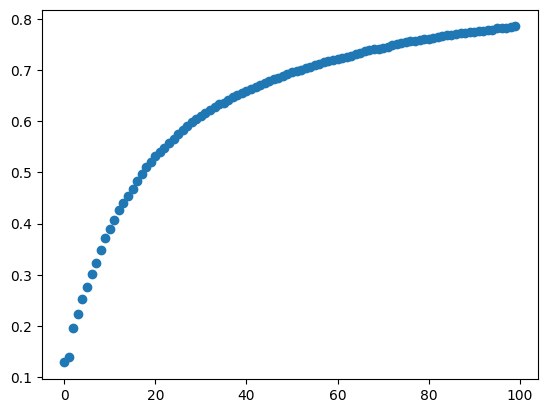

0.7848


In [8]:
from IPython.display import clear_output
loss = []
Acc = []
for ep in range (Epoch):
#feed fordware propagation
    x = x_train
    y = y_train
    
    zh1 = x@Wh1.T + bh1
    a = relu(zh1)
    
    zh2 = a@Wh2.T + bh2
    b = sigmoid(zh2)
    
    z = b@Wo.T + bo
    o = softmax(z)
    
    #calculate loss
    loss.append(-np.sum(np.multiply(y,np.log10(o))))
    
    #calculate the error for the ouput layer
    d = o-y
    
    #Back propagate error
    dh2 = d@Wo
    dhs2 = np.multiply(np.multiply(dh2,b),(1-b))
    
    dh1 = dh2@Wh2
    dhs1 = np.multiply(np.multiply(dh1,a),(1-a))
    
    dWo = np.matmul(np.transpose(d),b)
    dbo = np.mean(d) 
    
    dWh2 = np.matmul(np.transpose(dhs2),a)
    dbh2 = np.mean(dhs2)

    
    # Update weight 
    Wo = Wo - learningRate * dWo / NumTrainSamples
    bo = bo - learningRate * dbo
    
    Wh2 = Wh2 - learningRate * dWh2 / NumTrainSamples
    bh2 = bh2 - learningRate * dbh2

    Wh1 = Wh1 - learningRate * dWh1 / NumTrainSamples
    bh1 = bh1 - learningRate * dbh1
    
    #Test accuracy with random innitial weights
    prediction = Forwardpass(x_test,Wh1,bh1,Wh2,bh2,Wo,bo)
    Acc.append(AccTest(y_test,prediction))
    clear_output(wait=True)
    plt.plot([i for i, _ in enumerate(Acc)],Acc,'o')
    plt.show()

prediction = Forwardpass(x_test,Wh1,bh1,Wh2,bh2,Wo,bo)
Rate = AccTest(y_test,prediction)
print(Rate)

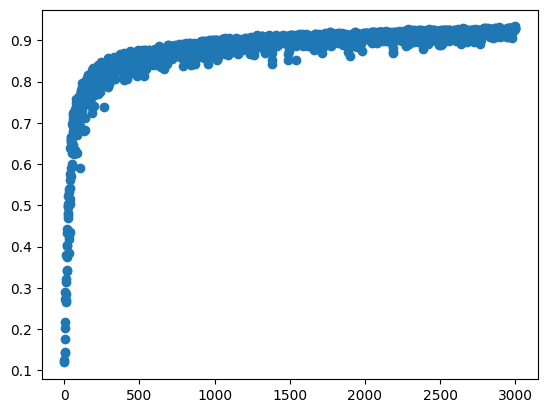

In [17]:
from IPython.display import clear_output
loss = []
Acc = []
Batch_size = 20
Stochastic_samples = np.arange(NumTrainSamples)
for ep in range (Epoch):
    np.random.shuffle(Stochastic_samples)
for ite in range (0,NumTrainSamples,Batch_size): 
    #feed fordware propagation
    Batch_samples = Stochastic_samples[ite:ite+Batch_size]
    x = x_train[Batch_samples,:]
    y=y_train[Batch_samples,:]
    
    zh1 = x@Wh1.T + bh1
    a = relu(zh1)
    
    zh2 = a@Wh2.T + bh2
    b = sigmoid(zh2)
    
    z = b@Wo.T + bo
    o = softmax(z)
    
    #calculate loss
    loss.append(-np.sum(np.multiply(y,np.log10(o))))
    #calculate the error for the ouput layer
    d = o-y
    #Back propagate error
    dh2 = d@Wo
    dhs2 = np.multiply(np.multiply(dh2,b),(1-b))
    
    dh1 = dh2@Wh2
    dhs1 = np.multiply(np.multiply(dh1,a),(1-a))
    
    dWo = np.matmul(np.transpose(d),b)
    dbo = np.mean(d) 
    
    dWh2 = np.matmul(np.transpose(dhs2),a)
    dbh2 = np.mean(dhs2)

    
    # Update weight 
    Wo = Wo - learningRate * dWo / Batch_size
    bo = bo - learningRate * dbo
    
    Wh2 = Wh2 - learningRate * dWh2 / Batch_size
    bh2 = bh2 - learningRate * dbh2

    Wh1 = Wh1 - learningRate * dWh1 / Batch_size
    bh1 = bh1 - learningRate * dbh1
    #Test accuracy with random innitial weights
    prediction = Forwardpass(x_test,Wh1,bh1,Wh2,bh2,Wo,bo)
    Acc.append(AccTest(y_test,prediction))
    clear_output(wait=True)
    plt.plot([i for i, _ in enumerate(Acc)],Acc,'o')
    plt.show()
